In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
emotion_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\text.csv')
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
violence_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Train.csv')
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [4]:
hate_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\labeled_data.csv')
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
emotion_df.drop(columns = ['Unnamed: 0'], inplace = True)
violence_df.drop(columns = ['Tweet_ID'], inplace = True)
hate_df = hate_df[['tweet', 'class']]

In [6]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [7]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [8]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [9]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [10]:
violence_df.rename(columns = {'tweet': 'text', 'type': 'label'}, inplace = True)
hate_df.rename(columns = {'tweet': 'text', 'class': 'label'}, inplace = True)

In [11]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [12]:
emotion_df.isnull().sum(), violence_df.isnull().sum(), hate_df.isnull().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [13]:
emotion_df.shape, violence_df.shape, hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

In [14]:
emotion_df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [15]:
e_df = pd.DataFrame()
for i in range(6):
    subset = emotion_df[emotion_df['label'] == i].sample(n = 1000, random_state = 42)
    e_df = pd.concat([e_df, subset])

In [16]:
e_df.shape

(6000, 2)

In [17]:
emotion_df = e_df.copy()

In [18]:
emotion_df['label'].value_counts()

label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
Name: count, dtype: int64

In [19]:
violence_df['label'].value_counts()

label
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64

In [20]:
sexual_violence = violence_df[violence_df['label'] == 'sexual_violence'].sample(n = 2944, random_state = 42)
physical_violence = violence_df[violence_df['label'] == 'Physical_violence'].sample(n = 2000, random_state = 42)
violence_df = violence_df[violence_df['label'] != 'sexual_violence']
violence_df = violence_df[violence_df['label'] != 'Physical_violence']

In [21]:
violence_df.shape

(1056, 2)

In [22]:
violence_df = pd.concat([sexual_violence, violence_df], axis = 0)
violence_df = pd.concat([physical_violence, violence_df], axis = 0)

In [23]:
violence_df.shape

(6000, 2)

In [24]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [25]:
one_df = hate_df[hate_df['label'] == 1].sample(n = 2570, random_state = 42)
ontwo_df = hate_df[hate_df['label'] == 2].sample(n = 2000, random_state = 42)
hate_df = hate_df[hate_df['label'] != 1]
hate_df = hate_df[hate_df['label'] != 2]

In [26]:
one_df.shape

(2570, 2)

In [27]:
ontwo_df.shape

(2000, 2)

In [28]:
hate_df.shape

(1430, 2)

In [29]:
hate_df = pd.concat([one_df,hate_df], axis = 0)
hate_df = pd.concat([ontwo_df,hate_df], axis = 0)

In [30]:
hate_df.shape

(6000, 2)

In [31]:
emotion_df.shape, violence_df.shape, hate_df.shape

((6000, 2), (6000, 2), (6000, 2))

In [32]:
emotion_df.head(3)

,text,label
133243,ive learned to surround myself with women who ...,0
88501,i already feel crappy because of this and you ...,0
131379,i feel like i have lost mourned and moved past...,0


In [33]:
emotion_df.reset_index(drop = True, inplace = True)
violence_df.reset_index(drop = True, inplace = True)
hate_df.reset_index(drop = True, inplace = True)

In [34]:
emotion_df.head(3)

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0


In [35]:
label_encoder = LabelEncoder()
violence_df['label'] = label_encoder.fit_transform(violence_df['label'])

In [36]:
violence_df.head(3)

,text,label
0,I’m the word person. My science husband beats ...,1
1,My Husband Beats Me - Housewife Runs To Court ...,1
2,I have this gnarly bruise on my forearm from g...,1


In [37]:
violence_df['label'].unique()

array([1, 4, 3, 0, 2])

In [38]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
stop_words = set(stopwords.words('english'))


In [40]:
len(stop_words)

179

In [41]:
def stopword_removal(text):
    all_words = nltk.word_tokenize(text)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [42]:
emotion_df['text'] = emotion_df['text'].apply(stopword_removal)
violence_df['text'] = violence_df['text'].apply(stopword_removal)
hate_df['text'] = hate_df['text'].apply(stopword_removal)

In [43]:
emotion_df.head()

,text,label
0,ive learned surround women lift leave feeling ...,0
1,already feel crappy upset situation doesnt help,0
2,feel like lost mourned moved past tears relati...,0
3,could write whole lot im feeling crappy dont t...,0
4,always seem feel inadequate,0


In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violence_df['text'], hate_df['text']]))

In [45]:
emotion_seq = tokenizer.texts_to_sequences(emotion_df['text'])
violence_seq = tokenizer.texts_to_sequences(violence_df['text'])
hate_seq = tokenizer.texts_to_sequences(hate_df['text'])

In [46]:
emotion_df['text'].iloc[2]

'feel like lost mourned moved past tears relationship'

In [47]:
emotion_seq[2]

[1, 4, 317, 7819, 1122, 413, 1036, 356]

In [48]:
max_length = 50
emotion_padded = pad_sequences(emotion_seq, maxlen = max_length, padding = 'post')
violence_padded = pad_sequences(violence_seq, maxlen = max_length, padding = 'post')
hate_padded = pad_sequences(hate_seq, maxlen = max_length, padding = 'post')

In [49]:
emotion_padded[2]

array([   1,    4,  317, 7819, 1122,  413, 1036,  356,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [50]:
emotion_label = np.array(emotion_df['label'])
violence_label = np.array(violence_df['label'])
hate_label = np.array(hate_df['label'])

In [51]:
emotion_input = emotion_padded
violence_input = violence_padded
hate_input = hate_padded

In [52]:
emotion_input_layer = keras.layers.Input(shape = (max_length,), name = 'emotion_input')
violence_input_layer = keras.layers.Input(shape = (max_length,), name = 'violence_input')
hate_input_layer = keras.layers.Input(shape = (max_length,), name = 'hate_input')

In [53]:
embedding_layer = keras.layers.Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 128)

In [54]:
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [55]:
shared_lstm = keras.layers.LSTM(64, return_sequences = True)


In [56]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


In [57]:
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [58]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [59]:
len(emotion_df['label'].unique()), len(violence_df['label'].unique()), len(hate_df['label'].unique())

(6, 5, 3)

In [60]:
emotion_output = keras.layers.Dense(6, activation = 'softmax', name = 'emotion_output')(emotion_features)
violence_output = keras.layers.Dense(6, activation = 'softmax', name = 'violence_output')(violence_features)
hate_output = keras.layers.Dense(6, activation = 'softmax', name = 'hate_output')(hate_features)

In [61]:
model = keras.models.Model(inputs = [emotion_input_layer, violence_input_layer, hate_input_layer],
                           outputs = [emotion_output, violence_output, hate_output])

model.compile(optimizer = 'adam',
             loss = {
                 'emotion_output' : 'sparse_categorical_crossentropy',
                 'violence_output' : 'sparse_categorical_crossentropy',
                 'hate_output' : 'sparse_categorical_crossentropy'
             },
             metrics = {
                 'emotion_output' : 'accuracy',
                 'violence_output' : 'accuracy',
                 'hate_output' : 'accuracy'
             })

In [62]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  3,577,856 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0],  │
│                     │                   │            │ embedding[2][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[1][0],       │
│                     │                   │            │ lstm[2][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 6)         │        390 │ dropout[1][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 6)         │        390 │ dropout[2][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,628,434 (13.84 MB)

 Trainable params: 3,628,434 (13.84 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.fit(x = {'emotion_input':emotion_input,
               'violence_input':violence_input,
               'hate_input':hate_input},
          y = {'emotion_output':emotion_label,
               'violence_output':violence_label,
               'hate_output':hate_label},
          epochs = 3,
          batch_size = 4)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 100s 63ms/step - emotion_output_accuracy: 0.2023 - emotion_output_loss: 1.7900 - hate_output_accuracy: 0.5012 - hate_output_loss: 1.0745 - loss: 3.6039 - violence_output_accuracy: 0.7191 - violence_output_loss: 0.7394
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 95s 64ms/step - emotion_output_accuracy: 0.6347 - emotion_output_loss: 0.9574 - hate_output_accuracy: 0.8277 - hate_output_loss: 0.4918 - loss: 1.5487 - violence_output_accuracy: 0.9674 - violence_output_loss: 0.0995
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 97s 65ms/step - emotion_output_accuracy: 0.9080 - emotion_output_loss: 0.3580 - hate_output_accuracy: 0.9121 - hate_output_loss: 0.2528 - loss: 0.6278 - violence_output_accuracy: 0.9969 - violence_output_loss: 0.0169


In [64]:
prediction = model.predict({'emotion_input':emotion_input,
                           'violence_input':violence_input,
                           'hate_input':hate_input})

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [65]:
prediction

[array([[9.4850260e-01, 6.1632623e-03, 6.0358120e-04, 1.7356971e-02,
         2.6455786e-02, 9.1789704e-04],
        [9.6671283e-01, 2.4372777e-03, 2.6328521e-04, 1.3460303e-02,
         1.6871655e-02, 2.5456445e-04],
        [9.6500844e-01, 4.0344116e-03, 3.6561000e-04, 1.7053425e-02,
         1.3022650e-02, 5.1545358e-04],
        ...,
        [3.8268948e-03, 5.9848521e-03, 7.2511460e-04, 4.4405862e-04,
         3.3263370e-02, 9.5575577e-01],
        [3.8955812e-03, 1.6643358e-02, 2.1453667e-03, 7.0232828e-04,
         1.3921990e-02, 9.6269143e-01],
        [2.1581543e-03, 1.5759796e-02, 1.3414278e-03, 2.8333603e-04,
         7.1859248e-03, 9.7327143e-01]], dtype=float32),
 array([[4.2648198e-06, 9.9984717e-01, 4.6407811e-05, 7.2823609e-06,
         9.3555318e-05, 1.3642068e-06],
        [2.6644318e-06, 9.9988186e-01, 8.3584295e-05, 6.6228936e-06,
         2.3874785e-05, 1.3285563e-06],
        [6.3030252e-06, 9.9976808e-01, 1.4758839e-04, 1.3755341e-05,
         6.0841561e-05, 3.424

In [66]:
emotion_pred = np.argmax(prediction[0], axis = 1)
violence_pred = np.argmax(prediction[1], axis = 1)
hate_pred = np.argmax(prediction[2], axis = 1)

In [67]:
violence_df['label'].unique()

array([1, 4, 3, 0, 2])

In [68]:
def plot_cm(true, pred, title, labels):
    cf = confusion_matrix(true, pred, normalize = 'true')
    plt.figure(figsize = (7,6))
    sns.heatmap(cf, annot = True, cmap = 'Blues', xticklabels = labels, yticklabels = labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_practice', 'economic violence']
hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

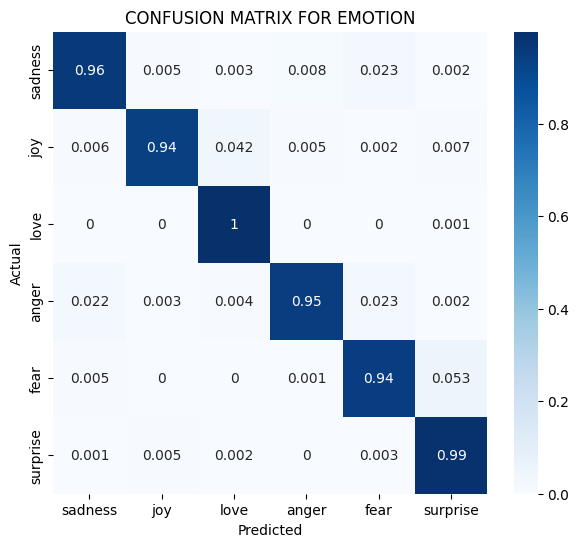

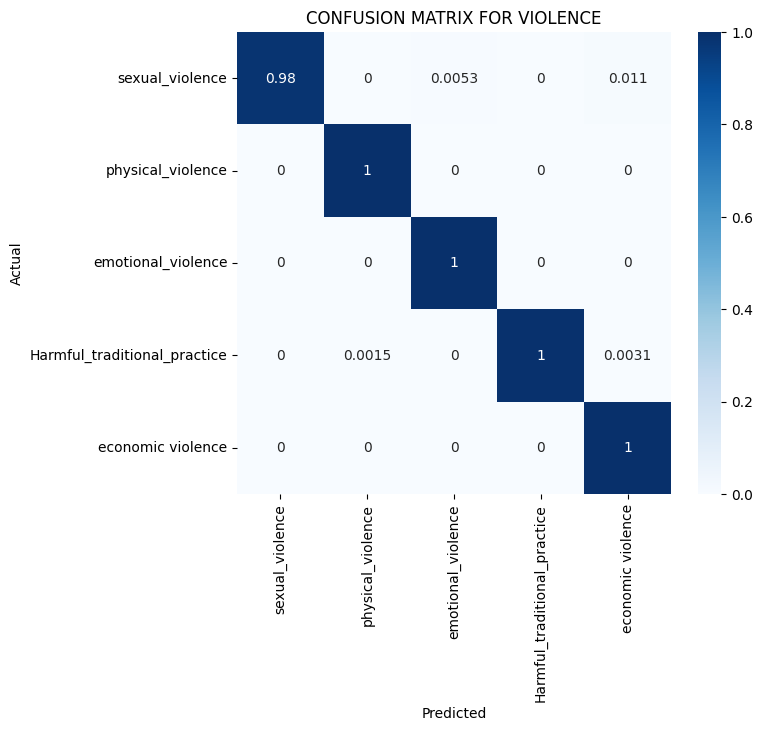

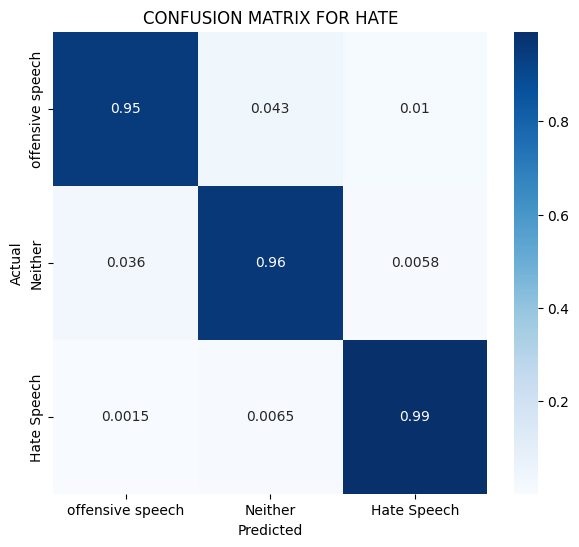

In [69]:
plot_cm(emotion_label, emotion_pred, 'CONFUSION MATRIX FOR EMOTION', emotion_labels_text)
plot_cm(violence_label, violence_pred, 'CONFUSION MATRIX FOR VIOLENCE', violence_labels_text)
plot_cm(hate_label, hate_pred, 'CONFUSION MATRIX FOR HATE', hate_labels_text)

In [70]:
def classify_text(input_text):
    #PREPROCESS THE INPUT TEXT
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequence, maxlen = max_length, padding = 'post')
    #PREDICTION
    preictions = model.predict({'emotion_input': input_padded,
                                'violence_input' : input_padded,
                                'hate_input' : input_padded})
    emotion_pred = np.argmax(predictions[0], axis  =1)[0]
    violence_pred = np.argmax(predictions[1], axis  =1)[0]
    hate_pred = np.argmax(predictions[2], axis  =1)[0]
    #DETERMINE MAJOR LABEL
    major_labels = ['Emotion', 'Violence', 'Hate']
    major_label_index = np.argmax([np.max(predictions[0]), np.max(predictions[1]), np.max(predictions[2])])
    major_label = major_labels[major_label_index]
    #DETERMINING SUB LABELS
    emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_practice', 'economic violence']
    hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

    if major_label == 'Emotion':
        sub_label = emotion_labels_text[emotion_pred]
    elif major_label == 'Violence':
        sub_label = violence_labels_text[violence_pred]
    else:
        sub_label = hate_labels_text[hate_pred]

    return major_label, sub_label


In [71]:
import ipywidgets as widgets
from IPython.display import display

In [72]:
input_text_widget = widgets.Text(
    description = 'Input text :',
    placeholder = 'Enter your text'
)

In [73]:
button = widgets.Button(description = 'classify')

In [74]:
output = widgets.Output()

In [75]:
def on_button_click(b):
    with output:
        output.clear_output() #CLEAR THE PREV OUTPUT
        input_text = input_text_widget.value
        major_label, sub_label = classify_text(input_text)
        print(f'Major Label: {major_label}')
        print(f'Sub Label: {sub_label}')

#ATTACH BUTTON
button.on_click(on_button_click)


In [76]:
display(input_text_widget, button, output)

Text(value='', description='Input text :', placeholder='Enter your text')

Button(description='classify', style=ButtonStyle())

Output()